This notebook plot some variables in mesh_mask.nc to take a look on the bbl.

In [28]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [29]:
mesh=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')

In [30]:
print mesh.variables.keys() 

[u'nav_lon', u'nav_lat', u'nav_lev', u'time_counter', u'tmask', u'umask', u'vmask', u'fmask', u'tmaskutil', u'umaskutil', u'vmaskutil', u'fmaskutil', u'glamt', u'glamu', u'glamv', u'glamf', u'gphit', u'gphiu', u'gphiv', u'gphif', u'e1t', u'e1u', u'e1v', u'e1f', u'e2t', u'e2u', u'e2v', u'e2f', u'ff', u'mbathy', u'e3t', u'e3u', u'e3v', u'e3w', u'gdept', u'gdepu', u'gdepv', u'gdepw', u'gdept_0', u'gdepw_0', u'e3t_0', u'e3w_0']


In [31]:
gdept=mesh.variables['gdept'][:]
gdepw=mesh.variables['gdepw'][:]
mbathy=mesh.variables['mbathy'][:]-1
e3t=mesh.variables['e3t'][:]
tmask=mesh.variables['tmask'][:]
e3w=mesh.variables['e3w'][:]
print mbathy.shape
print gdept.shape
print e3t.shape
print tmask.shape

(1, 800, 544)
(1, 50, 800, 544)
(1, 50, 800, 544)
(1, 50, 800, 544)


* explore the relation between e3t and gdepw

In [32]:
print gdept[0,:,0,0]

[  4.94025379e-01   1.54137540e+00   2.64566851e+00   3.81949472e+00
   5.07822371e+00   6.44061422e+00   7.92956018e+00   9.57299709e+00
   1.14050026e+01   1.34671383e+01   1.58100729e+01   1.84955597e+01
   2.15988159e+01   2.52114086e+01   2.94447289e+01   3.44341545e+01
   4.03440514e+01   4.73736877e+01   5.57642899e+01   6.58072739e+01
   7.78538513e+01   9.23260727e+01   1.09729279e+02   1.30665985e+02
   1.55850723e+02   1.86125565e+02   2.22475174e+02   2.66040253e+02
   3.18127441e+02   3.80213013e+02   4.53937744e+02   5.41088928e+02
   6.43566833e+02   7.63333069e+02   9.02339294e+02   1.06243970e+03
   1.24529114e+03   1.45225098e+03   1.68428442e+03   1.94189343e+03
   2.22507788e+03   2.53333618e+03   2.86570264e+03   3.22082031e+03
   3.59703198e+03   3.99248389e+03   4.40522412e+03   4.83329053e+03
   5.27478418e+03   5.72791650e+03]


In [33]:
print e3t[0,1:,22,33]+gdept[0,:-1,22,33]

[  1.56795349e+00   2.67812354e+00   3.85912435e+00   5.12661047e+00
   6.49968955e+00   8.00167848e+00   9.66102728e+00   1.15124411e+01
   1.35982415e+01   1.59700220e+01   1.86906503e+01   2.18366978e+01
   2.55013602e+01   2.97979851e+01   3.48643015e+01   4.08674657e+01
   4.80100811e+01   5.65372709e+01   6.67450248e+01   7.89898289e+01
   9.36997269e+01   1.11386787e+02   1.32660803e+02   1.58244037e+02
   1.88986232e+02   2.25879208e+02   2.70069389e+02   3.22866526e+02
   3.85746098e+02   4.60342243e+02   5.48428425e+02   6.51882219e+02
   7.72632733e+02   9.12590388e+02   1.07356066e+03   1.25714893e+03
   1.46466363e+03   1.69702972e+03   1.95472368e+03   2.23773894e+03
   2.54558665e+03   2.87733281e+03   3.23166332e+03   3.60697241e+03
   4.00145669e+03   4.41321121e+03   4.84031289e+03   5.28088987e+03
   5.73317591e+03]


* explore the relation between e3t and e3w

In [34]:
print e3t[0,:,22,33]

[   1.02248397    1.07392811    1.13674814    1.21345585    1.30711575
    1.42146585    1.56106425    1.73146709    1.93944404    2.19323886
    2.50288376    2.8805774     3.34113807    3.90254432    4.58657651
    5.41957269    6.43331124    7.6660297     9.16358317   10.98073496
   13.18255503   15.84587558   19.06071452   22.93152421   27.57805183
   33.13550866   39.75364387   47.59421545   56.82627305   67.61865655
   80.12922983   94.4906812   110.79329098  129.06589988  149.25731937
  171.22136908  194.70923404  219.37249455  244.7787401   270.4392599
  295.84550545  320.50876596  343.99663092  365.96068063  386.15210012
  404.42470902  420.7273188   435.08877017  447.59934345  458.39172695]


In [35]:
print (e3w[0,1:,22,33]+e3w[0,:-1,22,33])/2

[   1.02364578    1.07534657    1.13847981    1.21556964    1.30969565
    1.42461413    1.56490537    1.73615239    1.94515736    2.20020327
    2.51136947    2.89091118    3.35371417    3.91783708    4.60515464
    5.44211516    6.46062435    7.69906459    9.2034525    11.02872658
   13.24013941   15.91470224   19.14259071   23.02836709   27.69180285
   33.2679975    39.90638872   47.76814961   57.0213961    67.83362387
   80.36091898   94.73380627  111.04016955  129.30650052  149.47971063
  171.41263682  194.85682691  219.46581646  244.81068264  270.40731736
  295.75218354  320.36117309  343.80536318  365.73828937  385.91149948
  404.17783045  420.48419373  434.85708102  447.38437613]


In [36]:
#gdept[0,:,ii[1],jj[1]]-dep[:]

* find the bad points

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/newsol/ANHA4tmask_1m_20020101_20020702_ptrc_T.nc']
(6, 800, 544)
0


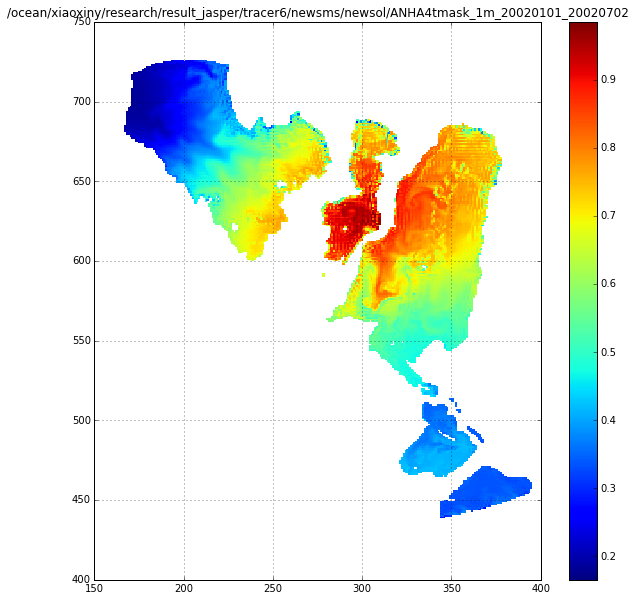

In [37]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/newsol/*ANHA*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

fig = plt.figure(figsize=(10,10))
for k in range (len(nc_filename)):
    ptrc=nc.Dataset(nc_filename[k])
    TR_7=ptrc.variables['TR_8'][:,42,:,:]#[:,:,::10,:10]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    print TR_7.shape

    ii=[]
    jj=[]
    timestep=-1
    for i in range (len(TR_7[0,:,0])):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>2:
                ii.append(i)
                jj.append(j)
    
    ax = fig.add_subplot(1,len(nc_filename),k+1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.colorbar()
    print len(jj)
    plt.scatter(jj,ii,color='grey',s=10)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
    plt.xlim([150,400])
    plt.ylim([400,750])
plt.show()

* plot vertical profile for one bad point and its adjacent cells

In [38]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry']

import matplotlib.cm as cm
def vetical(data,dep,string,jj,ii,ylim='False',detail='no'):
    
    for i in range (len(data[:,1,1,1])):
        cc=cm.Spectral(i*50)
        plt.plot(data[i,:,ii,jj],gdept[0,:,ii,jj],color=cc,linewidth=1,label='T:%s'%i)
        plt.legend(loc=0)

    for k in range (len(dep)):
        plt.axhline(gdept[0,k,ii,jj],c="green",linestyle='-.',linewidth=0.5,alpha=0.9)
        plt.hold(True)
        plt.axhline(gdepw[0,k,ii,jj],c="blue",linestyle='-',linewidth=0.5,alpha=0.5)
    plt.axhline(bathy[ii,jj],c="grey",linewidth=1,alpha=0.2)
    plt.axhline(gdept[0,mbathy[0,ii,jj],ii,jj],c="green",linestyle='-.',linewidth=2,alpha=1)
    plt.axhline(gdepw[0,mbathy[0,ii,jj]+1,ii,jj],c="blue",linestyle='-',linewidth=2,alpha=1)
    plt.ylabel('depth (m)')
    plt.xlabel('%s Conc.'%string)
    
    if ylim=='True':
        dmin=bathy[ii,jj]-800
        dmax=bathy[ii,jj]+1500
        plt.ylim([dmin,dmax])
    if detail =='yes':          
        print ('real world deepest:%s m'%(bathy[ii,jj]))
        print ('gdept      deepest:%s m'%gdept[0,mbathy[0,ii,jj],ii,jj])
        print ('gdepw      deepest:%s m'%gdepw[0,mbathy[0,ii,jj]+1,ii,jj])
        print ('mbathy            :%s  '%mbathy[0,ii,jj])
        print ('tmask             :%s  '%tmask[0,mbathy[0,ii,jj],ii,jj])
        #print ('depth             :%s m'%dep[mbathy[0,ii,jj]])
        print ('dz(k-2),dz(k-1), dz(k), dz(k+1):%s,%s,%s,%s'
               %(e3t[0,mbathy[0,ii,jj]-2,ii,jj],e3t[0,mbathy[0,ii,jj]-1,ii,jj],e3t[0,mbathy[0,ii,jj],ii,jj],e3t[0,mbathy[0,ii,jj]+1,ii,jj]))

In [39]:
ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

bad points from previous run that didn't multiply tmask in trcsms_my_trc.F90

In [40]:
ii=[677, 678, 686, 687, 687, 688, 688]
jj=[318, 318, 296, 297, 305, 297, 303]

## Infomation on the lines below:

* Blue lines indicate the w-grid: gdepw
* Thick Blue line : bottom level of w-point


* Green lines indicate the t-grid: gdept
* Thick Green line : bottom level of t-point


real world deepest:2748.99 m
gdept      deepest:2722.35 m
gdepw      deepest:2748.99 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,52.415479331,52.415479331


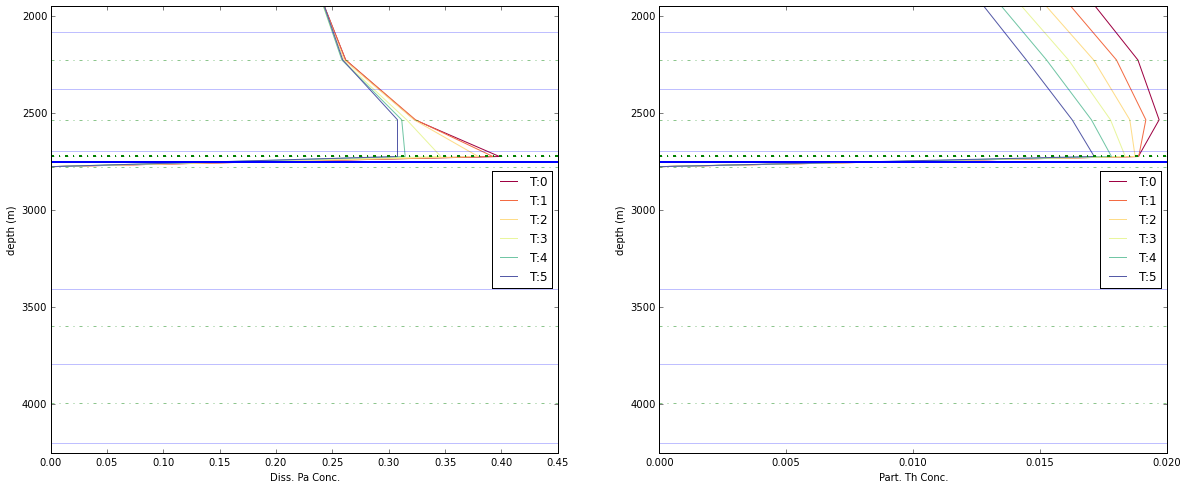

real world deepest:2728.74 m
gdept      deepest:2712.4 m
gdepw      deepest:2728.74 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,32.1683164667,32.1683164667


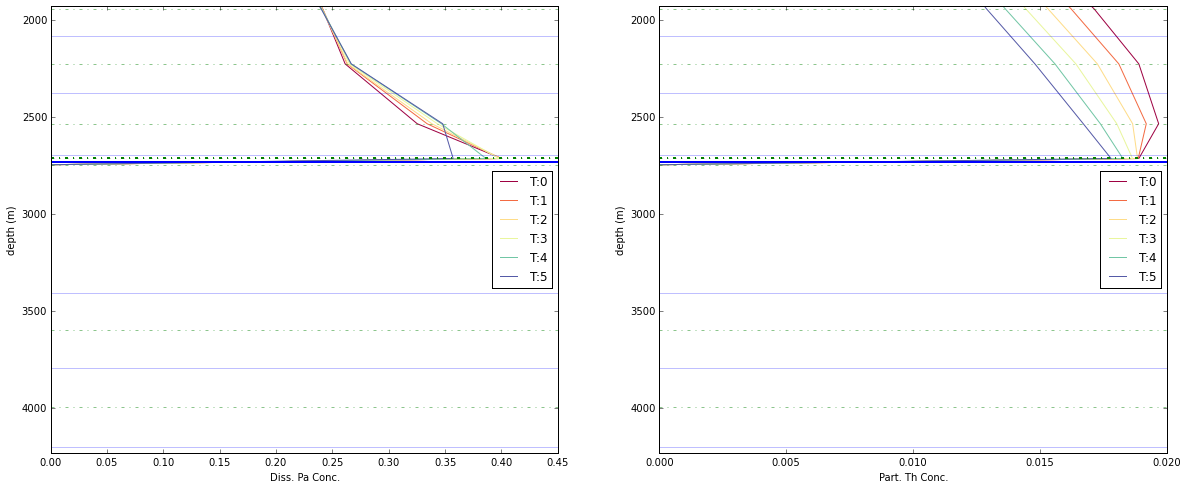

real world deepest:2723.57 m
gdept      deepest:2709.85 m
gdepw      deepest:2723.57 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,26.9935287221,26.9935287221


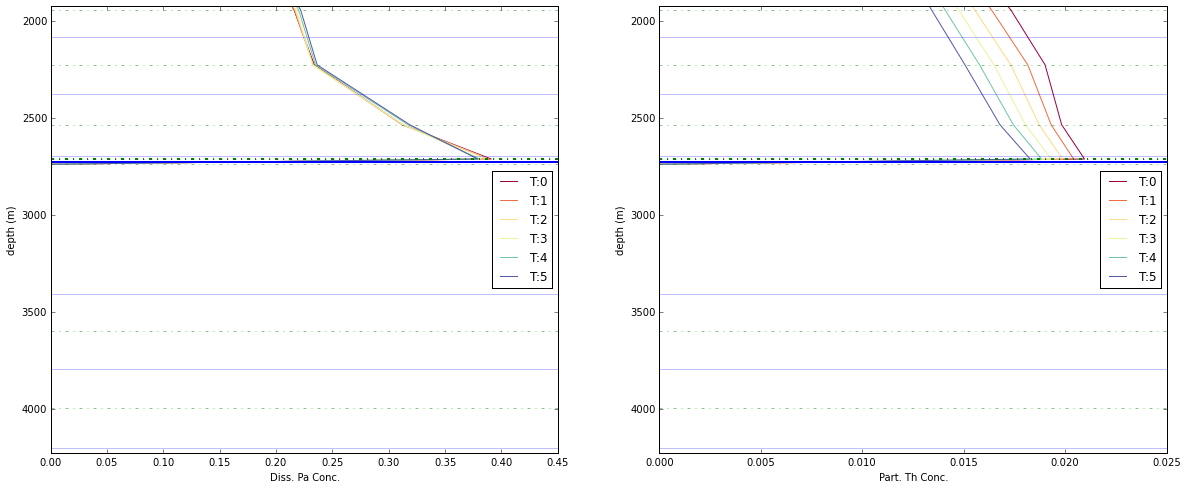

real world deepest:2729.56 m
gdept      deepest:2712.8 m
gdepw      deepest:2729.56 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,32.9799904221,32.9799904221


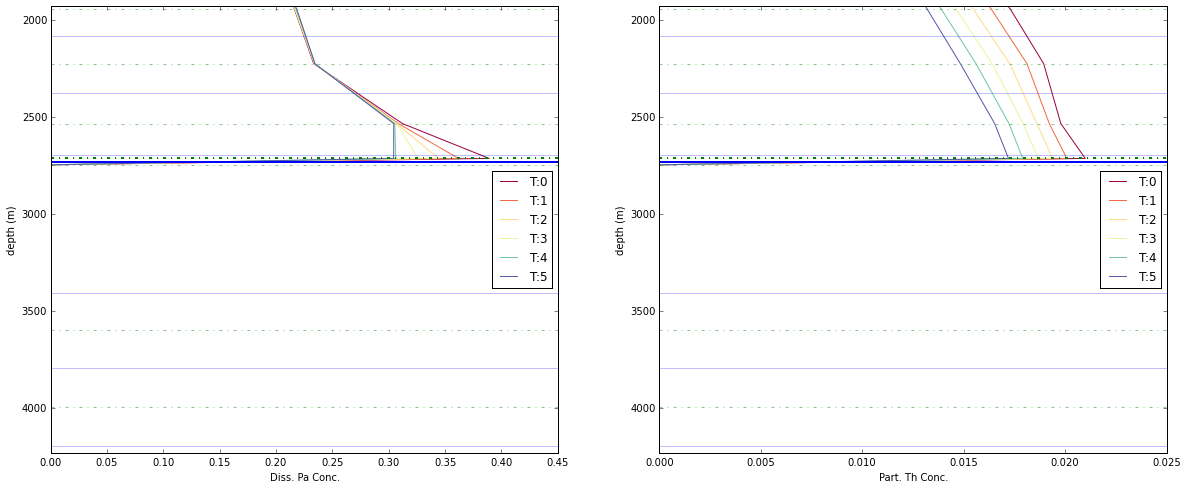

real world deepest:2729.58 m
gdept      deepest:2712.81 m
gdepw      deepest:2729.58 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,33.0070950578,33.0070950578


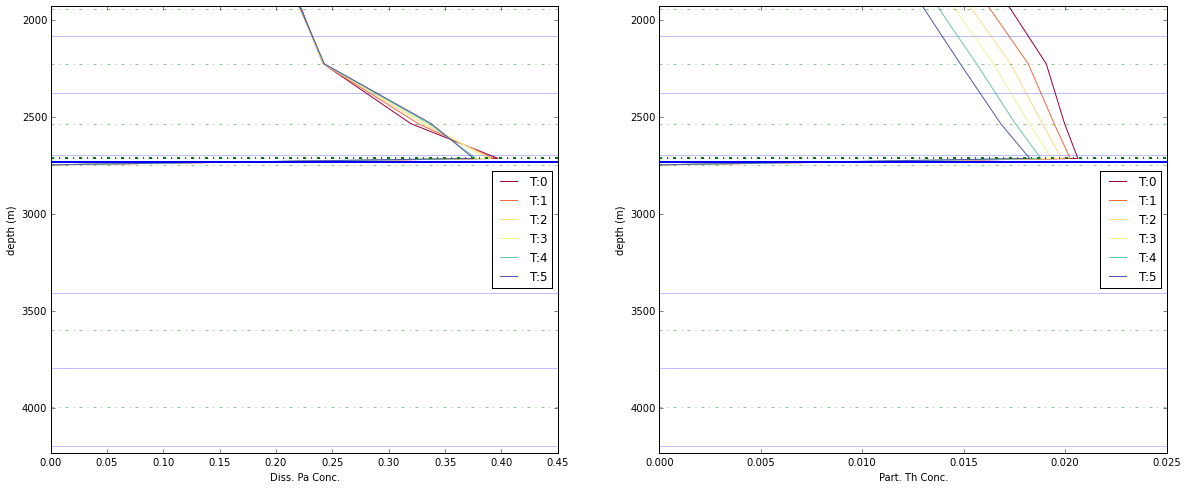

real world deepest:2722.0 m
gdept      deepest:2709.08 m
gdepw      deepest:2722.0 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,25.4199947364,25.4199947364


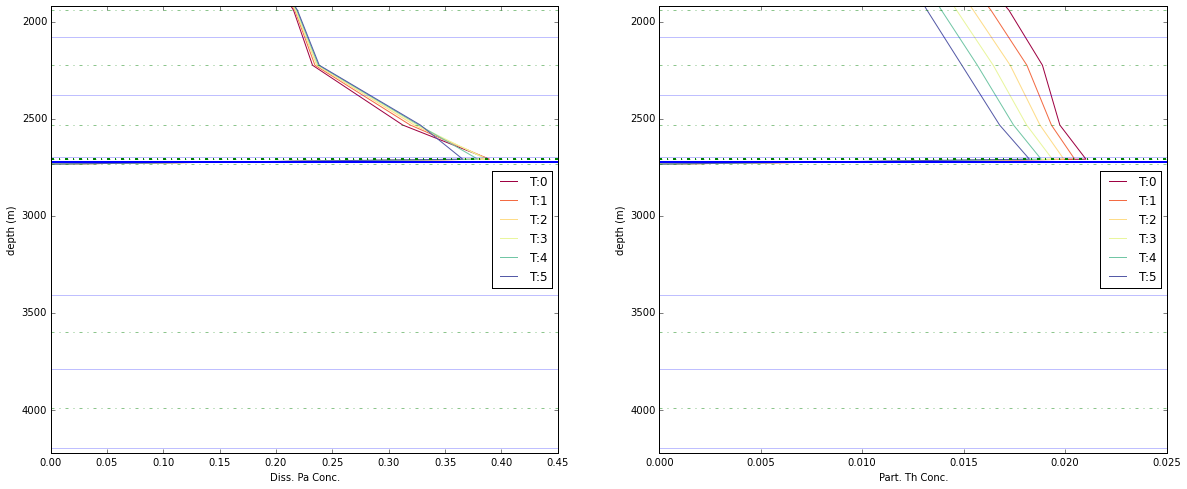

real world deepest:2723.09 m
gdept      deepest:2709.62 m
gdepw      deepest:2723.09 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,26.5093080682,26.5093080682


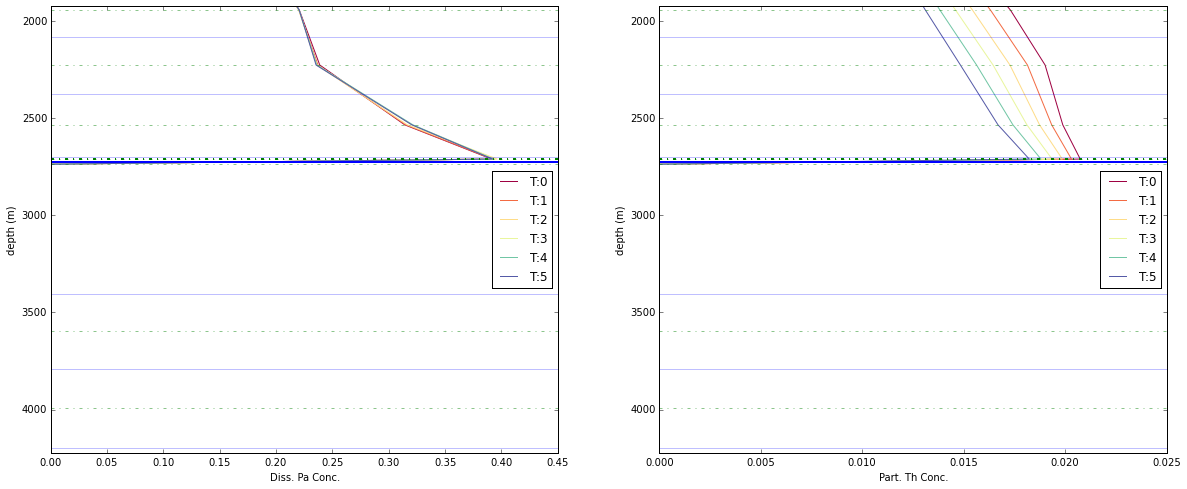

In [41]:
for i in range (0,len(ii)):
    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_7,dep,'Diss. Pa',jj=jj[i],ii=ii[i],ylim='True',detail='yes');plt.gca().invert_yaxis()
    plt.subplot(122);vetical(TR_9,dep,'Part. Th',jj=jj[i],ii=ii[i],ylim='True',detail='no');plt.gca().invert_yaxis()
    plt.show()

# Focus on one bad point

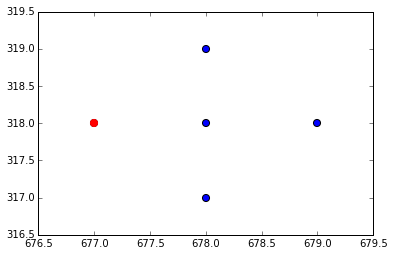

In [42]:
ik=[ii[1],ii[1]-1,ii[1]+1,ii[1]  ,ii[1]  ]
jk=[jj[1]  ,jj[1],jj[1]  ,jj[1]-1,jj[1]+1]
plt.scatter(ik,jk,s=50)
plt.scatter(ik[1],jk[1],color='r',s=50)

real world deepest:2728.74 m
gdept      deepest:2712.4 m
gdepw      deepest:2728.74 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,32.1683164667,32.1683164667


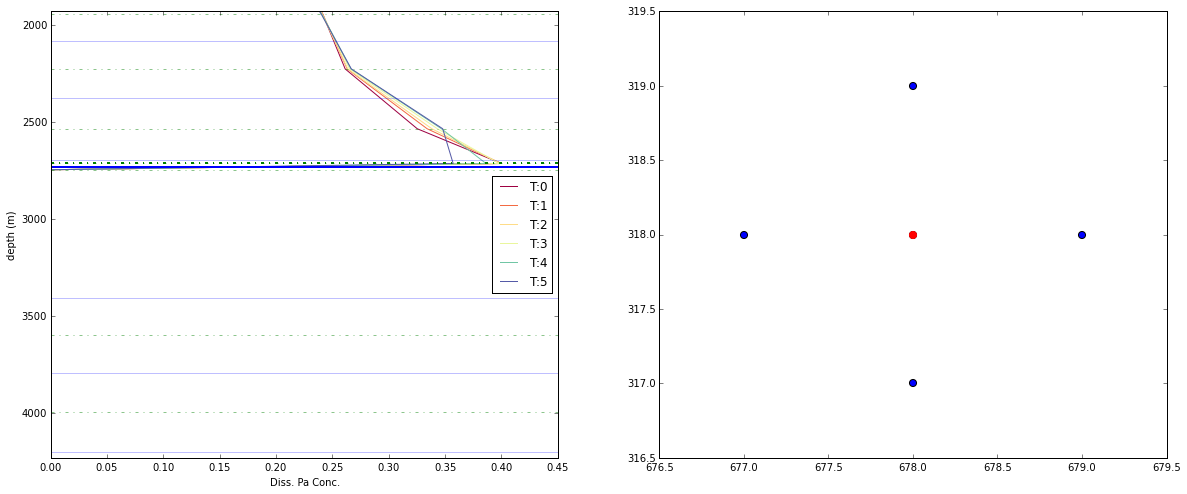

real world deepest:2748.99 m
gdept      deepest:2722.35 m
gdepw      deepest:2748.99 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,52.415479331,52.415479331


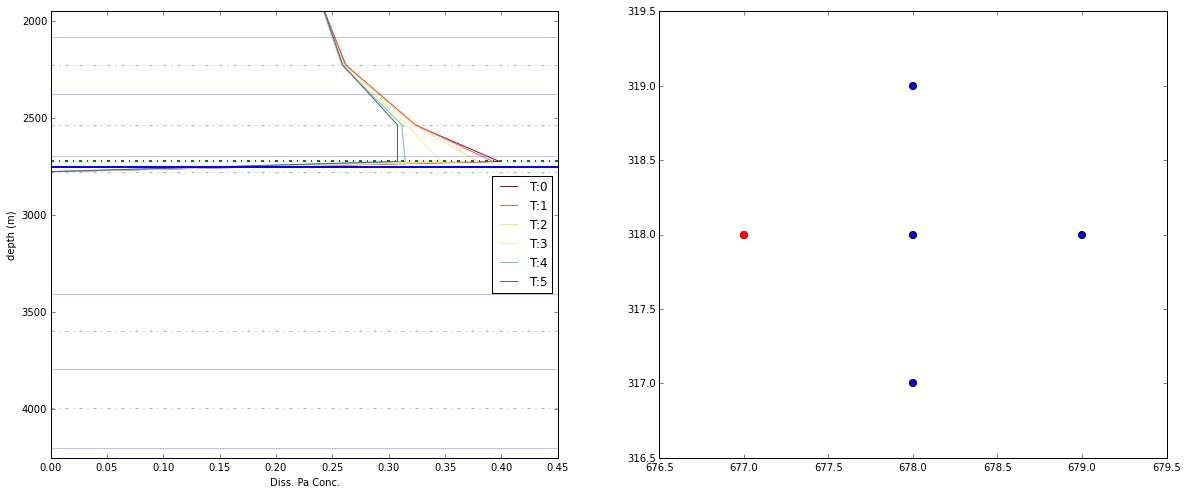

real world deepest:2685.68 m
gdept      deepest:2527.99 m
gdepw      deepest:2685.68 m
mbathy            :41  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):270.439259898,295.84550545,309.603035812,309.603035812


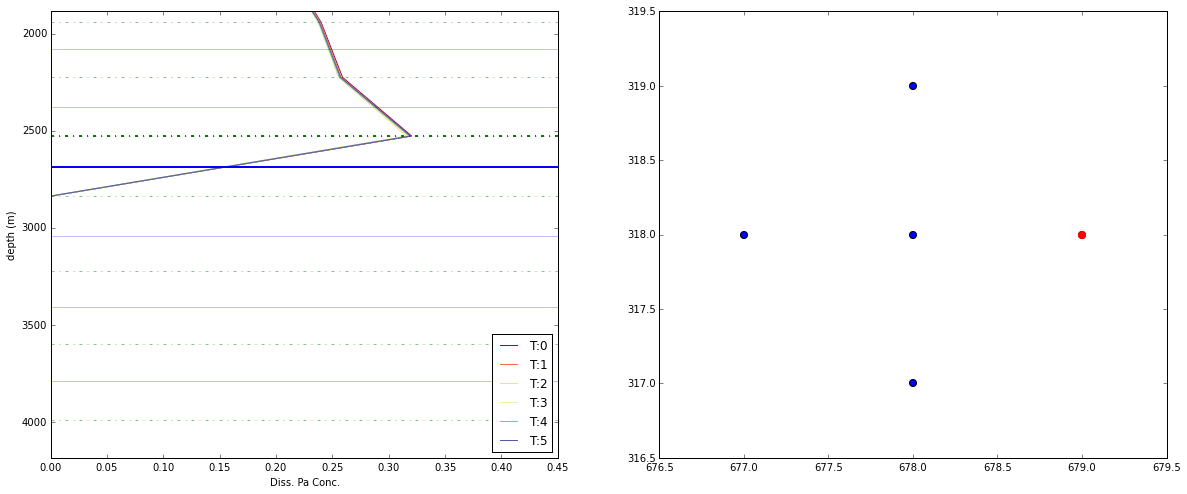

real world deepest:2762.92 m
gdept      deepest:2729.2 m
gdepw      deepest:2762.92 m
mbathy            :42  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):295.84550545,320.50876596,66.3467737065,66.3467737065


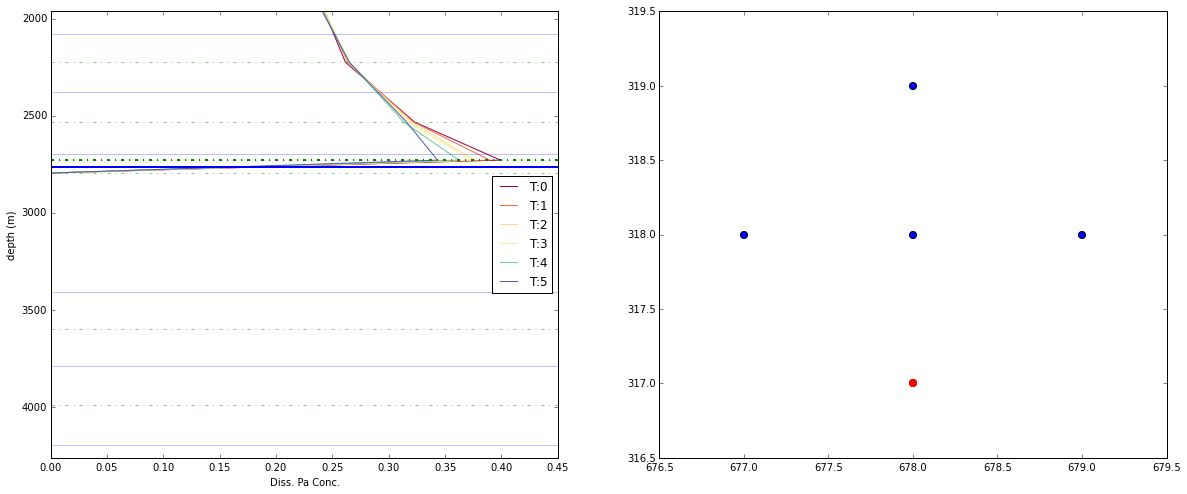

real world deepest:2671.84 m
gdept      deepest:2521.2 m
gdepw      deepest:2671.84 m
mbathy            :41  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):270.439259898,295.84550545,295.764240367,295.764240367


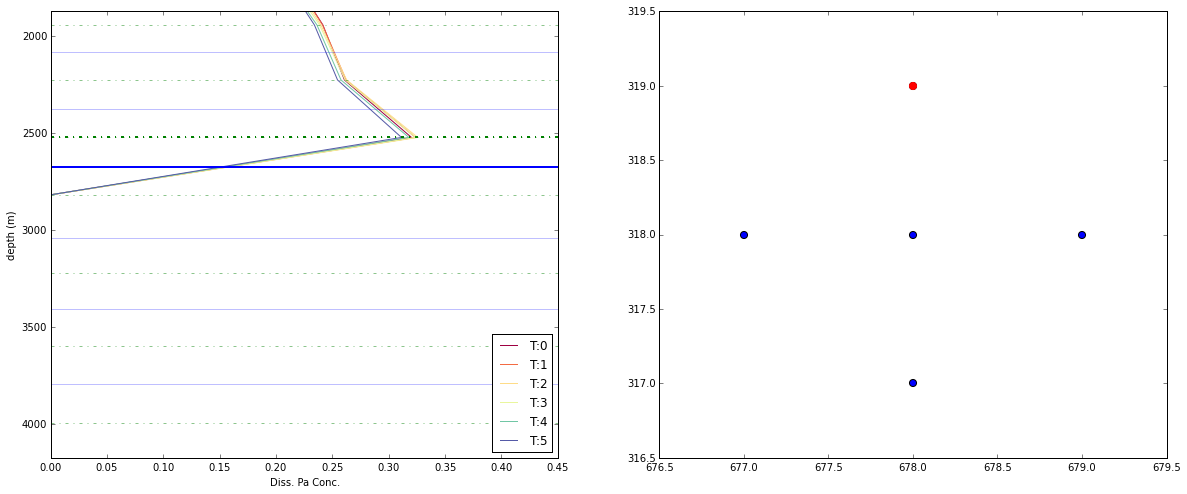

In [43]:
for i in range (0,len(ik)):
    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_7,dep,'Diss. Pa',jj=jk[i],ii=ik[i],ylim='True',detail='yes');plt.gca().invert_yaxis()
    plt.subplot(122);plt.scatter(ik,jk,s=50);plt.scatter(ik[i],jk[i],color='r',s=50)
    plt.show()

# Focus on a good point

real world deepest:3724.28 m
gdept      deepest:3563.36 m
gdepw      deepest:3724.28 m
mbathy            :44  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):343.996630921,365.960680629,317.948366475,317.948366475


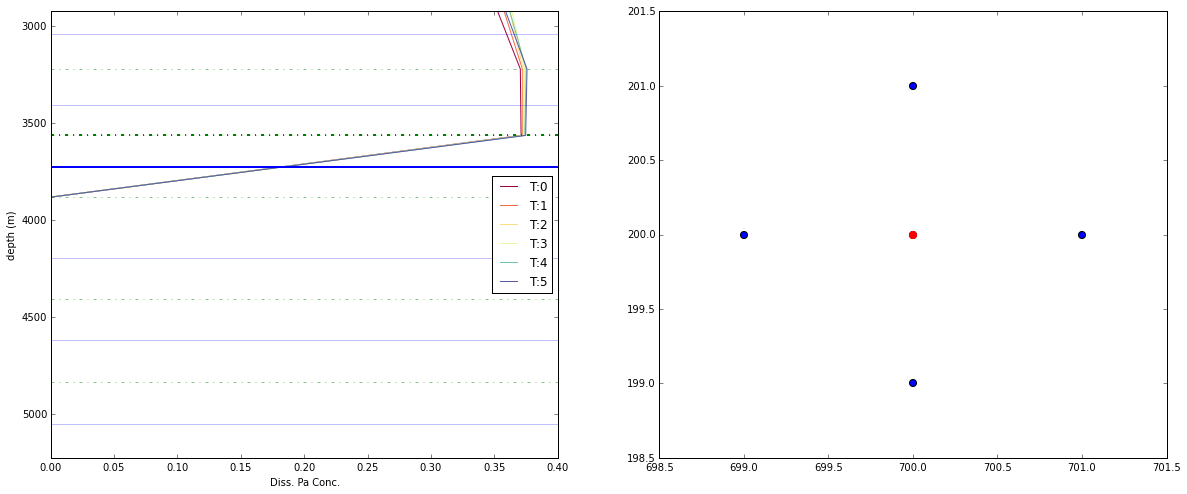

real world deepest:3725.48 m
gdept      deepest:3563.95 m
gdepw      deepest:3725.48 m
mbathy            :44  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):343.996630921,365.960680629,319.145880917,319.145880917


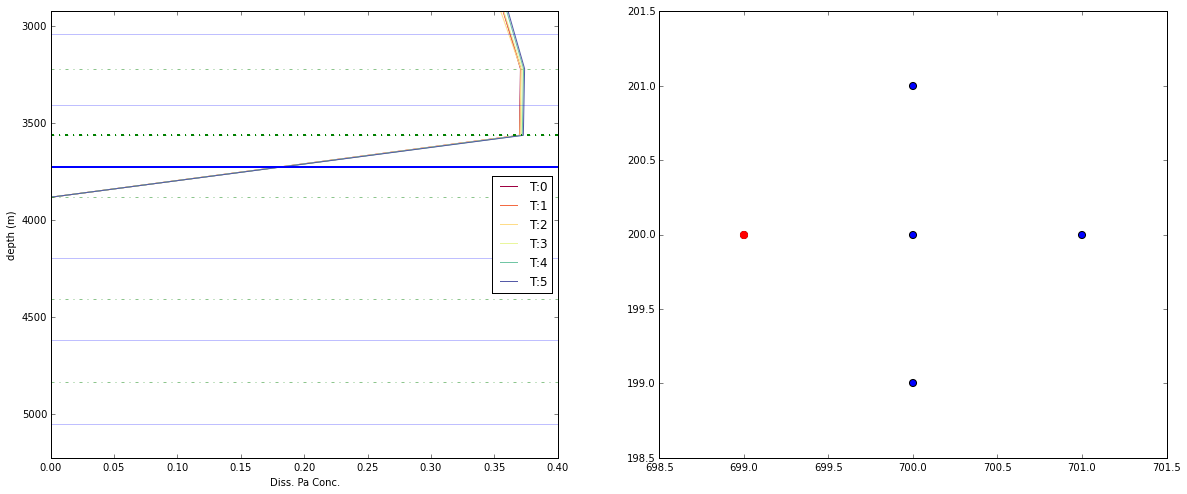

real world deepest:3723.9 m
gdept      deepest:3563.17 m
gdepw      deepest:3723.9 m
mbathy            :44  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):343.996630921,365.960680629,317.561078975,317.561078975


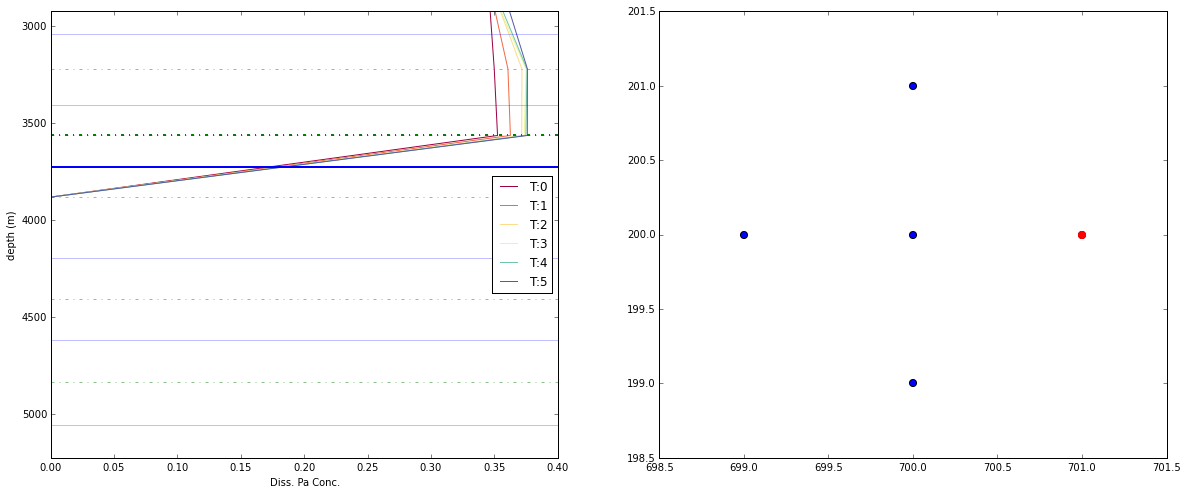

real world deepest:3717.23 m
gdept      deepest:3559.88 m
gdepw      deepest:3717.23 m
mbathy            :44  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):343.996630921,365.960680629,310.891724485,310.891724485


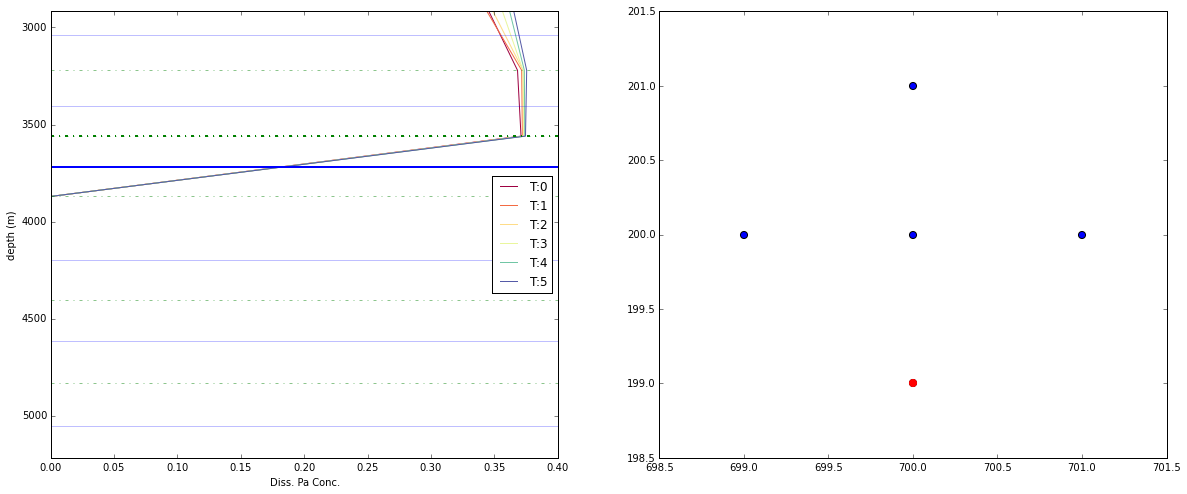

real world deepest:3731.19 m
gdept      deepest:3566.77 m
gdepw      deepest:3731.19 m
mbathy            :44  
tmask             :1  
dz(k-2),dz(k-1), dz(k), dz(k+1):343.996630921,365.960680629,324.858249457,324.858249457


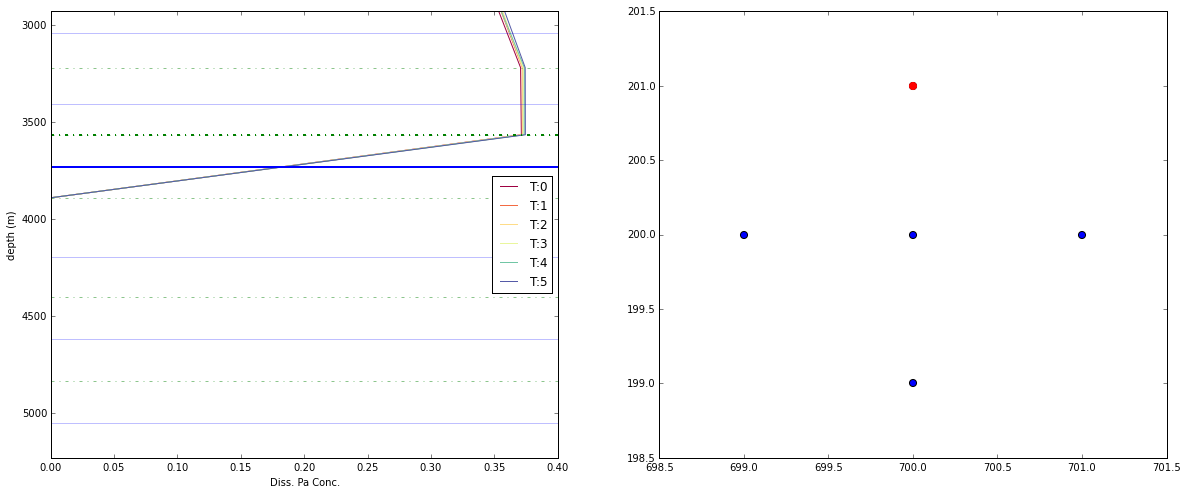

In [44]:
ii=[650,700,600,600]
jj=[200,200,350,400]

ik=[ii[1],ii[1]-1,ii[1]+1,ii[1]  ,ii[1]  ]
jk=[jj[1]  ,jj[1],jj[1]  ,jj[1]-1,jj[1]+1]

for i in range (0,len(ik)):
    fig = plt.figure(figsize=(20,8))
    plt.subplot(121);vetical(TR_7,dep,'Diss. Pa',jj=jk[i],ii=ik[i],ylim='True',detail='yes');plt.gca().invert_yaxis()
    plt.subplot(122);plt.scatter(ik,jk,s=50);plt.scatter(ik[i],jk[i],color='r',s=50)
    plt.show()